In [1]:
# importing libraries

!pip install pandas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import ast
import re
from collections import Counter
!pip install gender-guesser
import gender_guesser.detector as gender
import requests
import gender_guesser.detector as gender
# pip install git+https://github.com/namsor/namsor-python-sdk2.git


  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
  Attempting uninstall: python-dateutil
    Found existing installation: python-dateutil 2.7.5
    Uninstalling python-dateutil-2.7.5:
      Successfully uninstalled python-dateutil-2.7.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.41 requires requests_mock, which is not installed.
openapi-client 2.0.27 requires python-dateutil~=2.7.0, but you have python-dateutil 2.9.0.post0 which is incompatible.
conda-repo-cli 1.0.41 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.41 requires nbformat==5.4.0, but you have nbformat 5.7.0 which is incompatible.
conda-repo-cli 1.0.41 requires python-dateutil==2.8.2, but you have python-dateutil 2.9.0.post0 which is incompatible.


/Users/Isha/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Read CSV files from data folder and store in dataframes
hackathons_webscraped = pd.read_csv('/Users/Isha/Desktop/TUe/Year 3/BEP/BEP_project/hackathons_webscraped.csv')
hackathons = pd.read_csv('/Users/Isha/Desktop/TUe/Year 3/BEP/BEP_project/data/hackathons_modified.csv')
participants = pd.read_csv('/Users/Isha/Desktop/TUe/Year 3/BEP/BEP_project/data/participants_modified.csv')
participants_links = pd.read_csv('/Users/Isha/Desktop/TUe/Year 3/BEP/BEP_project/data/participants_links_modified.csv')
projects = pd.read_csv('/Users/Isha/Desktop/TUe/Year 3/BEP/BEP_project/data/projects_modified.csv')

/var/folders/_f/7jgfw7qx5jn8xl64g_9px9g00000gp/T/ipykernel_72884/4245125413.py:4: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  participants = pd.read_csv('/Users/Isha/Desktop/TUe/Year 3/BEP/BEP_project/data/participants_modified.csv')


#### Understanding participants and participants_links to link them effectively:

In [3]:
print('Rows in participants df:', len(participants))
print('Rows in participants_links df:', len(participants_links))

# Checking why the number of rows in participants and participant_links is different to link the dataframes
participants_links
# Check if every row in the 'url' column contains 'devpost'
contains_devpost = participants_links['url'].str.contains('devpost', case=False).all()

print('Do all the urls in participants_links point to the devpost profile of each participant?',contains_devpost)
# output True thus, all the urls are for the participants devpost profiles


participants # already see some NaN entries
# Check if every row in the 'url' column contains 'devpost'
contains_devpost = participants['url'].str.contains('devpost', case=False).all()

print('Do all the urls in participants point to the devpost profile of each participant?',contains_devpost)
# output True, , all the urls are for the participants devpost profiles or they are Nan

# Checking number of NaN values in each of the dataframes
# For the 'participants' DataFrame
nan_count_participants_url = participants['url'].isna().sum()
print('Total NaN in participants df:', nan_count_participants_url) # only 1804 have devpost profiles

# For the 'participants_links' DataFrame
nan_count_participants_links_url = participants_links['url'].isna().sum()
print('Total NaN in participants_links df:', nan_count_participants_links_url) # getting more rows than total so not even possible

#nan_count_participants_url = participants['url'].isna().sum()
#nan_count_participants_links_url = participants_links['url'].isna().sum()

Rows in participants df: 282095
Rows in participants_links df: 191638
Do all the urls in participants_links point to the devpost profile of each participant? True
Do all the urls in participants point to the devpost profile of each participant? True
Total NaN in participants df: 280291
Total NaN in participants_links df: 0


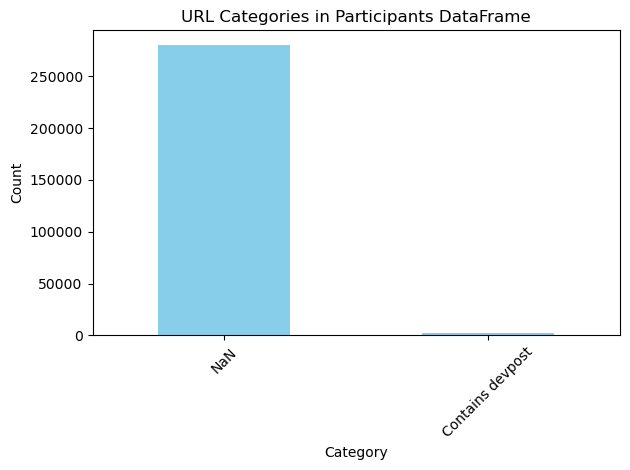

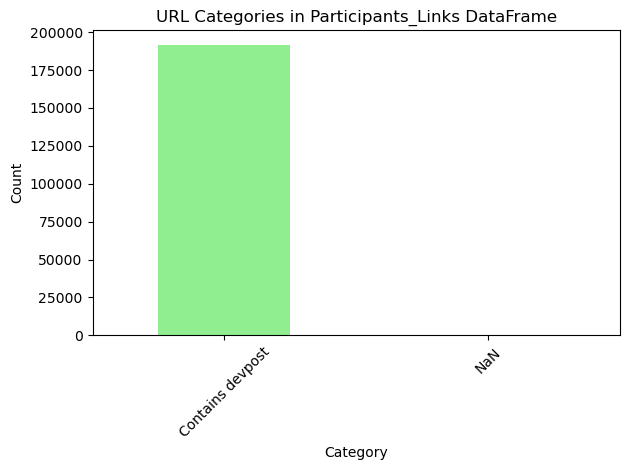

categories_participants:    url
NaN                 280291
Contains devpost      1804
Name: count, dtype: int64
categories_participants_links:    url
Contains devpost    191638
NaN                      0
Name: count, dtype: int64


In [4]:
# Function to categorize each URL
def categorize_url(url):
    if pd.isna(url):
        return 'NaN'
    elif 'devpost' in url:
        return 'Contains devpost'
    else:
        return 'Other'

# Apply the categorization and count the occurrences for 'participants' DataFrame for 'url' column only
categories_participants = participants['url'].apply(categorize_url).value_counts()
# Add NaN count for 'url' column
categories_participants['NaN'] = nan_count_participants_url

# Plot for 'participants' DataFrame
categories_participants.plot(kind='bar', color='skyblue')
plt.title('URL Categories in Participants DataFrame')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout() # Adjusts plot to ensure everything fits without overlap
plt.show()

# Apply the categorization and count the occurrences for 'participants_links' DataFrame for 'url' column only
categories_participants_links = participants_links['url'].apply(categorize_url).value_counts()
# Add NaN count for 'url' column
categories_participants_links['NaN'] = nan_count_participants_links_url

# Plot for 'participants_links' DataFrame
categories_participants_links.plot(kind='bar', color='lightgreen')
plt.title('URL Categories in Participants_Links DataFrame')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout() # Adjusts plot to ensure everything fits without overlap
plt.show()

print('categories_participants:   ',categories_participants)
print('categories_participants_links:   ',categories_participants_links)

So, participants df: (for url column)
- total = 282,095 (90,457 more than participants_links df)
- "contains devpost" urls = 1804
- "NaN" = 280,291

participants_links df: (for url column)
- total = 191,638
- "contains devpost" urls = 191,638
- "NaN" = 0

**Thus, perhaps better to stick with using participants_links since it contains the devpost profiles for post of the participants and their skills - but does it include info about the hackathon they participated in?**

In [5]:
projects # project_URL being the identifier
# columns - participants (contain devpost links of the participants) and participants_num (indicate # participants of each project)
# how to find all the projects submitted to the same hackathon? -> chaoran made a df with the extra 2 columns
participants_links_expanded = pd.read_csv('/Users/Isha/Desktop/TUe/Year 3/BEP/BEP_project/data/participants_with_projects_and_hackathons.csv')

participants_links_expanded 
# contains information about the projects and hackathons that each of the participants participated in 

,url,name,website,github,twitter,address,skills,interests,projects,hackathons
0,https://devpost.com/CraigHiller,Craig Hiller,NaN,NaN,NaN,NaN,NaN,NaN,https://devpost.com/software/googme,https://calhacks.devpost.com/
1,https://devpost.com/asheleby,Andrew Sheleby,NaN,NaN,NaN,United States,wordpress|python|tableau|excel|Blockchain|,AR/VR|Blockchain|Communication|Cybersecurity|D...,https://devpost.com/software/helpr-27tjik,https://hackhealth-2021.devpost.com/
2,https://devpost.com/evanho239,Evan Ho,NaN,NaN,NaN,United States,java|c++|javascript|angular.js|css|html|Blockc...,Beginner Friendly|Blockchain|Cybersecurity|Des...,https://devpost.com/software/untitled-for-now,https://hack32022.devpost.com/
3,https://devpost.com/brilamb,Brian Lam,https://github.com/Brooseidon,https://github.com/Brooseidon,NaN,US,java|javascript|,Communication|Cybersecurity|Gaming|IoT|Machine...,https://devpost.com/software/the-hummingbird-p...,"https://hacksc-2020.devpost.com/,https://sd-ha..."
4,https://devpost.com/linpeng06,lin peng,https://github.com/linpeng06,https://github.com/linpeng06,NaN,NaN,android|javascript|php|java|ios|jquery|css|htm...,NaN,https://devpost.com/software/arduinosetup,https://pearlhacks2016.devpost.com/
...,...,...,...,...,...,...,...,...,...,...
56490,https://devpost.com/mike1572,Mike Dimitrov,https://mikedimitrov.io/,https://github.com/mike1572,NaN,Canada,python|java|react|react-native|firebase|c#|nod...,AR/VR|Blockchain|E-commerce/Retail|Fintech|Mac...,https://devpost.com/software/textbook-exchange...,https://hack-mcwics-2022.devpost.com/
56491,https://devpost.com/bengao,Baiyun (Ben) Gao,NaN,NaN,NaN,United States,mac|web|windows|,NaN,https://devpost.com/software/odataxpt-open-dat...,https://gsatraveldata.devpost.com/
56492,https://devpost.com/EveretS,Everet Siew,NaN,NaN,NaN,NaN,NaN,NaN,https://devpost.com/software/let-s-greet,https://tactrickdevcup.devpost.com/
56493,https://devpost.com/amulyagarimella,Amulya Garimella,https://amulyagarimella.github.io/,https://github.com/amulyagarimella,NaN,United States,web|react|python|flask|html5|websockets|node.j...,Beginner Friendly|Design|Education|Health|Mach...,https://devpost.com/software/locavore,https://wafflehacks-2022.devpost.com/


Which dataframes are going to be used to answer H1, H2, H3?
1. participants_links_expanded
2. hackathons(_modified)
3. hackathons_webscraped

In [13]:
print('Columns in participants_links_expanded:  ',participants_links_expanded.columns.tolist())
print('Columns in hackathons:  ',hackathons.columns.tolist())
print('Columns in hackathons_webscraped:  ',hackathons_webscraped.columns.tolist())

Columns in participants_links_expanded:   ['url', 'name', 'website', 'github', 'twitter', 'address', 'skills', 'interests', 'projects', 'hackathons']
Columns in hackathons:   ['Unnamed: 0', 'URL', 'Criteria', 'schedule', 'hack_type', 'info', 'start_date_format', 'end_date_format', 'Prizes', 'prize_money', 'Id', 'Title', 'Location', 'start_date', 'end_date', 'year', 'themes', 'prize', 'registered_N', 'featured', 'organization_name', 'winners_announced', 'submission_gallery_url', 'start_a_submission_url']
Columns in hackathons_webscraped:   ['Subtitles', 'Sponsors', 'Tags', 'Judges', 'Judging Criteria', 'Eligibility', 'Requirements', 'URL', 'Cleaned_Sponsors', 'Cleaned_Judges', 'Cleaned_Eligibility', 'Cleaned_Requirements']


In [6]:
# Columns to drop in hackathons
columns_to_drop_hackathons = ['Unnamed: 0', 'schedule', 'hack_type', 'info','start_date', 'end_date','prize','featured','winners_announced']
# Drop the columns from the DataFrame
hackathons = hackathons.drop(columns=columns_to_drop_hackathons)
print('Columns in hackathons:  ',hackathons.columns.tolist())


Columns in hackathons:   ['URL', 'Criteria', 'start_date_format', 'end_date_format', 'Prizes', 'prize_money', 'Id', 'Title', 'Location', 'year', 'themes', 'registered_N', 'organization_name', 'submission_gallery_url', 'start_a_submission_url']


### Cleaning the webscraped data using NLP techniques

In [3]:
hackathons_webscraped

,Subtitles,Sponsors,Tags,Judges,Judging Criteria,Eligibility,Requirements,URL
0,Wie können wir als Gesellschaft die Herausford...,"['<a target=""_blank"" title=""Go to Impact Hub B...",['\n Social Good\n ...,['<strong>Jury</strong>'],"['Gesellschaftlicher Mehrwert', 'Innovationsgr...","['<article id=""challenge-eligibility"">\n ...",['<div>\n <p><span>Diese Hackathon Seit...,https://wirvsvirushackathon.devpost.com/
1,Fighting a Global Crisis - 3 billion people in...,[],['\n COVID-19\n ...,['<strong>TBA</strong>'],"['Potential impact of the project', 'Technical...","['<article id=""challenge-eligibility"">\n ...",['<div>\n <p><strong>Participants:</str...,https://theglobalhack.devpost.com/
2,Internet Computer Web3 Hackathon,"['<img id=""sponsor_logo_polychain capital"" cla...",['\n DFINITY Foundation\n ...,"['<strong>Olaf Carlson-Wee</strong>', '<strong...","['X Factor and Potential', 'Technical Competen...","['<article id=""challenge-requirements"">\n ...",['<div>\n <h4>HACKATHON TRACKS</h4>\n<p...,https://supernova.devpost.com/
3,#Hajj_Hackathon ...,[],[],['<strong>TBD</strong>'],"['Design | التصميم ', 'S...","['<article id=""challenge-requirements"">\n ...","[""<div>\n <p>\xa0</p>\n<ul>\n<li><stron...",https://hajjhackathon.devpost.com/
4,Build the next generation of Web3 apps with $5...,"['<h5>Platinum Sponsors</h5>', '<img id=""spons...",['\n Chainlink Labs\n ...,"['<strong>Austin Griffith</strong>', '<strong>...","['User Experience / User Interface', 'Original...","['<article id=""challenge-requirements"">\n ...","[""<div>\n <p>Each project must use Chai...",https://chainlinkspring2022.devpost.com/
...,...,...,...,...,...,...,...,...
7043,checkinproject,[],['\n ACM Monterrey\n ...,['<strong>josh</strong>'],['biden'],"['<article id=""challenge-sponsors-mobile"" clas...","['<div id=""sponsor-tiles"">\n \n </div>', '...",https://checkinproject.devpost.com/
7044,Create a connected future powered by apps,"['<a target=""_blank"" title=""Go to Youtube page...",['\n Dong Trinh LTD\n ...,['<strong>Nghia</strong>'],"['Criteria 1', 'Criteria 1', 'criteria']","['<article id=""challenge-requirements"">\n ...",['<div>\n <p>Hackathon site - Submissio...,https://fgtfrgf.devpost.com/
7045,Try submitting some old hacks for testing,[],['\n Hackers Galore\n ...,['<strong>Deana</strong>'],['TBA'],"['<article id=""challenge-sponsors-mobile"" clas...","['<div id=""sponsor-tiles"">\n \n </div>', '...",https://old-hacks.devpost.com/
7046,Thailand champion,[],['\n Screen Composers Guild of ...,['<strong>Thailand</strong>'],['biden'],"['<article id=""challenge-sponsors-mobile"" clas...","['<div id=""sponsor-tiles"">\n \n </div>', '...",https://thailand-champion-13627.devpost.com/


In [7]:
# Function to extract sponsors' names from HTML strings
def extract_sponsor_names(html_list_string):
    # Convert the string representation of a list into an actual list
    html_list = ast.literal_eval(html_list_string)
    sponsor_names = []
    
    for html_str in html_list:
        # Parse HTML
        soup = BeautifulSoup(html_str, 'html.parser')
        # Find all 'img' tags and get the 'alt' attribute which contains the sponsor name
        for img in soup.find_all('img'):
            sponsor_names.append(img.get('alt', 'No alt attribute'))  # Default value if 'alt' is missing

    return sponsor_names

# Assuming the 'Sponsors' column in your DataFrame contains strings that represent lists of HTML
hackathons_webscraped['Cleaned_Sponsors'] = hackathons_webscraped['Sponsors'].apply(extract_sponsor_names)

# Show the result for the first entry
print(hackathons_webscraped['Cleaned_Sponsors'])

0       [Impact Hub Berlin, SEND, D21, Tech4Germany, P...
1                                                      []
2       [Polychain Capital, a16z, IRONGREY, Messari, S...
3                                                      []
4       [Filecoin, Polkadot, Alchemy, Fundamental Labs...
                              ...                        
7043                                                   []
7044                          [Youtube, youtube, Youtube]
7045                                                   []
7046                                                   []
7047                                                   []
Name: Cleaned_Sponsors, Length: 7048, dtype: object


In [8]:
# Function to extract judges' names from HTML strings
def extract_judge_names(html_list_string):
    # Convert the string representation of a list into an actual list
    html_list = ast.literal_eval(html_list_string)
    judge_names = []
    
    for html_str in html_list:
        # Parse HTML
        soup = BeautifulSoup(html_str, 'html.parser')
        # Extract text from 'strong' tag which contains the judge name
        judge_names.append(soup.get_text())

    return judge_names

# Assuming the 'Judges' column in your DataFrame contains strings that represent lists of HTML
hackathons_webscraped['Cleaned_Judges'] = hackathons_webscraped['Judges'].apply(extract_judge_names)

# Show the result for the example entry
print(hackathons_webscraped['Cleaned_Judges'])

0                                                  [Jury]
1                                                   [TBA]
2       [Olaf Carlson-Wee, Maria Shen, Tom Serres, Vin...
3                                                   [TBD]
4       [Austin Griffith, Allen Day, Ivan Liljeqvist, ...
                              ...                        
7043                                               [josh]
7044                                              [Nghia]
7045                                              [Deana]
7046                                           [Thailand]
7047                                              [Khanh]
Name: Cleaned_Judges, Length: 7048, dtype: object


In [9]:
hackathons_webscraped['Eligibility'][3]
# Function to extract text content from HTML strings
def extract_eligibility_text(html_list_string):
    # Convert the string representation of a list into an actual list
    html_list = ast.literal_eval(html_list_string)
    eligibility_text = []
    
    for html_str in html_list:
        # Parse HTML
        soup = BeautifulSoup(html_str, 'html.parser')
        # Extract text and replace non-breaking space with a space
        text = soup.get_text(separator=' ', strip=True).replace(u'\xa0', u' ')
        eligibility_text.append(text)

    return ' '.join(eligibility_text)  # Join all text content into a single string

# Assuming the 'Eligibility' column in your DataFrame contains strings that represent lists of HTML
hackathons_webscraped['Cleaned_Eligibility'] = hackathons_webscraped['Eligibility'].apply(extract_eligibility_text)

# Show the result for the example entry
print(hackathons_webscraped['Cleaned_Eligibility']) # mix of eligibility and requirements

0       Eligibility Diese Hackathon Seite richtet sich...
1       Eligibility Participants: Individuals (over 18...
2       Requirements HACKATHON TRACKS The hackathon ha...
3       Requirements Devpost Deadline 1 - First projec...
4       Requirements Each project must use Chainlink i...
                              ...                        
7043                                   Hackathon Sponsors
7044    Requirements Hackathon site - Submission requi...
7045                                   Hackathon Sponsors
7046                                   Hackathon Sponsors
7047                                   Hackathon Sponsors
Name: Cleaned_Eligibility, Length: 7048, dtype: object


In [10]:
# Eligibility might be having more problems

def further_clean_eligibility(text):
    # Step 1: Remove known placeholder texts
    placeholders = ['Hackathon Sponsors']
    for placeholder in placeholders:
        text = text.replace(placeholder, '').strip()

    # Step 2: Separate 'Eligibility' from 'Requirements' if mixed
    # Example: Assuming 'Requirements:' is a marker for the start of requirements text
    if 'Requirements:' in text:
        text = text.split('Requirements:')[0].strip()

    # Step 3: Replace or flag irrelevant or generic text
    # Here you can add conditions based on your observations of the data
    if text in ['Not specified', '']:
        return 'Eligibility information not provided'
    
    return text

# Apply the further cleaning function
hackathons_webscraped['Cleaned_Eligibility'] = hackathons_webscraped['Cleaned_Eligibility'].apply(further_clean_eligibility)

# Example to check the cleaning
print(hackathons_webscraped['Cleaned_Eligibility'])

# print(hackathons_webscraped['Cleaned_Requirements'][2])

0       Eligibility Diese Hackathon Seite richtet sich...
1       Eligibility Participants: Individuals (over 18...
2       Requirements HACKATHON TRACKS The hackathon ha...
3       Requirements Devpost Deadline 1 - First projec...
4       Requirements Each project must use Chainlink i...
                              ...                        
7043                 Eligibility information not provided
7044    Requirements Hackathon site - Submission requi...
7045                 Eligibility information not provided
7046                 Eligibility information not provided
7047                 Eligibility information not provided
Name: Cleaned_Eligibility, Length: 7048, dtype: object


In [11]:
# Function to extract text content from HTML strings
def extract_requirements_text(html_list_string):
    # Convert the string representation of a list into an actual list
    html_list = ast.literal_eval(html_list_string)
    requirements_text = []
    
    for html_str in html_list:
        # Parse HTML
        soup = BeautifulSoup(html_str, 'html.parser')
        # Extract text and replace non-breaking space with a space
        text = soup.get_text(separator=' ', strip=True).replace(u'\xa0', ' ')
        requirements_text.append(text)

    return ' '.join(requirements_text)  # Join all text content into a single string

# Assuming the 'Requirements' column in your DataFrame contains strings that represent lists of HTML
hackathons_webscraped['Cleaned_Requirements'] = hackathons_webscraped['Requirements'].apply(extract_requirements_text)

# Show the result for the example entry
print(hackathons_webscraped['Cleaned_Requirements']) # include parts of eligibility too 

# print(hackathons_webscraped['Cleaned_Requirements'][2])

0       Diese Hackathon Seite richtet sich an die Teil...
1       Participants: Individuals (over 18 years in ag...
2       HACKATHON TRACKS The hackathon has six super i...
3       Devpost Deadline 1 - First project submission ...
4       Each project must use Chainlink in some form t...
                              ...                        
7043                                           cash value
7044    Hackathon site - Submission requirementHackath...
7045                                                  TBA
7046                                        Thailand cash
7047                                                    1
Name: Cleaned_Requirements, Length: 7048, dtype: object


#### Issue with Eligibility and Requirements
There is an overlap. Should i leave it as is or should I make sure they are fully separate and if they overlap then say one or the other section does not exist? 

In [26]:
hackathons_webscraped
hackathons_webscraped.to_csv('hackathons_webscraped_cleaned.csv')

In [13]:
# Create a mask of rows in 'hackathons' where the URL is present in 'hackathons_webscraped'
mask = hackathons['URL'].isin(hackathons_webscraped['URL'])

# Apply the mask to keep only the matching rows in 'hackathons'
hackathons = hackathons[mask]

# hackathons_filtered now contains only the rows from hackathons that have a URL present in hackathons_webscraped
hackathons

,URL,Criteria,start_date_format,end_date_format,Prizes,prize_money,Id,Title,Location,year,themes,registered_N,organization_name,submission_gallery_url,start_a_submission_url
0,https://wirvsvirushackathon.devpost.com/,"Gesellschaftlicher Mehrwert, Innovationsgrad, ...",2020-03-20,2020-03-22,"Euer Preis ist Anerkennung und Ehre!, Habt Spa...",no money prize,9683,#WirVsVirus,Online,2020,"Social Good, COVID-19",12505,Not Specified,https://wirvsvirushackathon.devpost.com/projec...,https://wirvsvirushackathon.devpost.com/challe...
1,https://theglobalhack.devpost.com/,"Potential impact of the project, Technical exe...",2020-04-03,2020-04-09,Overall Winner,no money prize,9854,The Global Hack,Online,2020,COVID-19,6059,Not Specified,https://theglobalhack.devpost.com/project-gallery,https://theglobalhack.devpost.com/challenges/s...
2,https://supernova.devpost.com/,"X Factor and Potential, Technical Competence, ...",2022-05-10,2022-06-22,"SocialFi - 1ST PLACE, SocialFi - 2ND PLACE, So...","$765,000",13738,Supernova,Online,2022,"Social Good, Blockchain, Open Ended",3633,DFINITY Foundation,https://supernova.devpost.com/project-gallery,https://supernova.devpost.com/challenges/start...
3,https://hajjhackathon.devpost.com/,"Design | التصميم, Simpli...",2018-08-01,2018-08-03,1st place: 1 million Saudi Riyal (15% equity i...,"SAR2,000,000",6815,Hajj Hackathon,Jeddah International Exhibition & Convention C...,2018,Not Specified,2935,Not Specified,https://hajjhackathon.devpost.com/project-gallery,https://hajjhackathon.devpost.com/challenges/s...
4,https://chainlinkspring2022.devpost.com/,"User Experience / User Interface, Originality ...",2022-04-22,2022-05-28,"Chainlink Grand Prize - $40,000, Chainlink NFT...","$1,019,000",15086,Chainlink Spring 2022 Hackathon,Online,2022,"Blockchain, Web, Fintech",1481,Chainlink Labs,https://chainlinkspring2022.devpost.com/projec...,https://chainlinkspring2022.devpost.com/challe...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7048,https://checkinproject.devpost.com/,biden,2021-08-30,2021-08-30,cash value,"$1,000",13493,CheckInProject,Thái Lan,2021,Voice skills,1,ACM Monterrey,https://checkinproject.devpost.com/project-gal...,https://checkinproject.devpost.com/challenges/...
7049,https://fgtfrgf.devpost.com/,"Criteria 1, Criteria 1, criteria",2021-07-15,2021-07-15,"1st place, 2nd place, 3rd place, 4nd","$1,100",13108,AI Apps - Hackathon 2021,Online,2021,"AR/VR, Machine Learning/AI, Open Ended",1,Dong Trinh LTD,https://fgtfrgf.devpost.com/project-gallery,https://fgtfrgf.devpost.com/challenges/start_a...
7050,https://old-hacks.devpost.com/,TBA,2021-05-07,2021-05-07,TBA,no money prize,12674,Old Hacks,"Quận 2, Vietnam",2021,Open Ended,1,Hackers Galore,https://old-hacks.devpost.com/project-gallery,https://old-hacks.devpost.com/challenges/start...
7051,https://thailand-champion-13627.devpost.com/,biden,2021-09-15,2021-09-15,Thailand cash,$100,13627,Thailand champion,Thái Lan,2021,Voice skills,0,Screen Composers Guild of Canada & SOCAN,https://thailand-champion-13627.devpost.com/pr...,https://thailand-champion-13627.devpost.com/ch...


In [14]:
participants_links_expanded


,url,name,website,github,twitter,address,skills,interests,projects,hackathons
0,https://devpost.com/CraigHiller,Craig Hiller,NaN,NaN,NaN,NaN,NaN,NaN,https://devpost.com/software/googme,https://calhacks.devpost.com/
1,https://devpost.com/asheleby,Andrew Sheleby,NaN,NaN,NaN,United States,wordpress|python|tableau|excel|Blockchain|,AR/VR|Blockchain|Communication|Cybersecurity|D...,https://devpost.com/software/helpr-27tjik,https://hackhealth-2021.devpost.com/
2,https://devpost.com/evanho239,Evan Ho,NaN,NaN,NaN,United States,java|c++|javascript|angular.js|css|html|Blockc...,Beginner Friendly|Blockchain|Cybersecurity|Des...,https://devpost.com/software/untitled-for-now,https://hack32022.devpost.com/
3,https://devpost.com/brilamb,Brian Lam,https://github.com/Brooseidon,https://github.com/Brooseidon,NaN,US,java|javascript|,Communication|Cybersecurity|Gaming|IoT|Machine...,https://devpost.com/software/the-hummingbird-p...,"https://hacksc-2020.devpost.com/,https://sd-ha..."
4,https://devpost.com/linpeng06,lin peng,https://github.com/linpeng06,https://github.com/linpeng06,NaN,NaN,android|javascript|php|java|ios|jquery|css|htm...,NaN,https://devpost.com/software/arduinosetup,https://pearlhacks2016.devpost.com/
...,...,...,...,...,...,...,...,...,...,...
56490,https://devpost.com/mike1572,Mike Dimitrov,https://mikedimitrov.io/,https://github.com/mike1572,NaN,Canada,python|java|react|react-native|firebase|c#|nod...,AR/VR|Blockchain|E-commerce/Retail|Fintech|Mac...,https://devpost.com/software/textbook-exchange...,https://hack-mcwics-2022.devpost.com/
56491,https://devpost.com/bengao,Baiyun (Ben) Gao,NaN,NaN,NaN,United States,mac|web|windows|,NaN,https://devpost.com/software/odataxpt-open-dat...,https://gsatraveldata.devpost.com/
56492,https://devpost.com/EveretS,Everet Siew,NaN,NaN,NaN,NaN,NaN,NaN,https://devpost.com/software/let-s-greet,https://tactrickdevcup.devpost.com/
56493,https://devpost.com/amulyagarimella,Amulya Garimella,https://amulyagarimella.github.io/,https://github.com/amulyagarimella,NaN,United States,web|react|python|flask|html5|websockets|node.j...,Beginner Friendly|Design|Education|Health|Mach...,https://devpost.com/software/locavore,https://wafflehacks-2022.devpost.com/


## Descriptive statistics 

### hackathons and hackathons_webscraped dataframe

1) Prizes and Prize Money Analysis

In [ ]:
# Function to calculate proportions
def calculate_numeric_proportions(hackathons, prize_money):
    # Check if each value in the column is numeric (True) or not (False)
    is_numeric = pd.to_numeric(hackathons[prize_money], errors='coerce').notna()
    
    # Calculate proportions
    numeric_proportion = is_numeric.mean()
    non_numeric_proportion = 1 - numeric_proportion
    
    return numeric_proportion, non_numeric_proportion

# Calculate and print proportions
numeric_proportion, non_numeric_proportion = calculate_numeric_proportions(hackathons, 'prize_money')
print(f"Numeric Proportion: {numeric_proportion:.2f}")
print(f"Non-Numeric Proportion: {non_numeric_proportion:.2f}")

Values Are Not in a Recognizable Numeric Format: If the data includes symbols, letters, or is formatted in a way that pd.to_numeric cannot recognize as numbers (including currency symbols or commas in numbers), it would fail to convert these to numeric types.

In [ ]:
hackathons['prize_money']
hackathons['prize_money'] = hackathons['prize_money'].astype(str)  # Ensure everything is treated as string
non_numeric_entries = hackathons[~hackathons['prize_money'].str.replace('.', '', 1).str.isnumeric()]
print(non_numeric_entries['prize_money'].unique())


### Strategy for Handling Mixed Formats in prize_money
1. **Replace Non-Numeric Placeholder Texts**: For entries like "no money prize", decide on a uniform treatment—either replace with NaN or 0.

2. **Standardize Currency Formats**: Remove currency symbols and other non-numeric characters like commas to standardize the format before converting to numeric. Given the presence of different currencies, you might also want to convert all values to a single currency for consistency, which requires determining the exchange rate for each entry based on its currency.

3. **Handle Various Currencies**: If exact conversion rates are not critical for your analysis, you could simplify the approach by converting all amounts to a uniform numeric format without actual currency conversion. This assumes comparative analysis within the same currency is not a primary concern. For precise financial analysis, however, you'd need to use current or historical exchange rates applicable to the date of each hackathon.

In [ ]:
# Example function to clean and convert prize_money to a numeric format
def clean_prize_money(value):
    if value == 'no money prize':
        return np.nan  # or 0, depending on how you wish to handle these cases
    # Remove currency symbols and commas
    numeric_value = value.replace('$', '').replace('£', '').replace('MEX$', '').replace('SAR', '').replace(',', '')
    return pd.to_numeric(numeric_value, errors='coerce')

# Apply the function to the prize_money column
hackathons['prize_money_clean'] = hackathons['prize_money'].apply(clean_prize_money)

# Now you can calculate proportions again or conduct other numerical analyses
numeric_proportion = hackathons['prize_money_clean'].notna().mean()
non_numeric_proportion = 1 - numeric_proportion

print(f"Numeric Proportion: {numeric_proportion:.2f}")
print(f"Non-Numeric Proportion: {non_numeric_proportion:.2f}")

#hackathons['prize_money'][:50]

2) Themes or Tags Frequency Analysis

In [ ]:
type(hackathons['themes'])
#hackathons['themes']

# Ensure the column is treated as string and split on ', ' to get lists of themes
hackathons['themes'] = hackathons['themes'].astype(str).apply(lambda x: x.split(', '))

# Verify the operation worked as expected by inspecting the first few entries
# print(hackathons['themes'].head())

# Flatten the list of lists into a single list
all_themes = [theme for sublist in hackathons['themes'].dropna() for theme in sublist]

# Count the frequency of each theme
theme_counts = Counter(all_themes)

# Display the most common themes
print("Most common themes and their counts:")
for theme, count in theme_counts.most_common():
    print(f"{theme}: {count}")

3) Judging Criteria, Eligibility, and Requirements Text Analysis

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Combine Judging Criteria, Eligibility, and Requirements into one Series for analysis
criteria_eligibility_requirements = pd.concat([hackathons_webscraped['Judging Criteria'], hackathons_webscraped['Eligibility'], hackathons_webscraped['Requirements']])

# Initialize CountVectorizer, focusing on specific keywords
vectorizer = CountVectorizer(vocabulary=['diversity', 'women', 'female', 'innovation', 'skills'], lowercase=True)
counts = vectorizer.fit_transform(criteria_eligibility_requirements.dropna()).toarray().sum(axis=0)

# Mapping the counts to the respective words
keywords_count = dict(zip(vectorizer.get_feature_names(), counts))

print(keywords_count)


### Gender inference tools

### 1) gender-guesser library

In [15]:
# testing gender-guesser library
detector = gender.Detector()

# Example
name = "Alex"
gender = detector.get_gender(name)
print(f"The inferred gender for {name} is {gender}.")


The inferred gender for Alex is male.


In [17]:
# Ensure you've imported the gender_guesser.detector and created an instance of the Detector
import gender_guesser.detector as gender
detector = gender.Detector()

# Function to apply the gender detector on each name
def infer_gender_from_name(full_name):
    # Assuming the first name is the first word in the 'name' column entry
    first_name = full_name.split()[0] if pd.notnull(full_name) else ''
    return detector.get_gender(first_name)

# Applying the function to the 'name' column of your DataFrame
participants_links_expanded['inferred_gender_gender_guesser_lib'] = participants_links_expanded['name'].apply(infer_gender_from_name)

# Display the first few entries to verify
participants_links_expanded[['name', 'inferred_gender_gender_guesser_lib']]

,name,inferred_gender_gender_guesser_lib
0,Craig Hiller,male
1,Andrew Sheleby,male
2,Evan Ho,male
3,Brian Lam,male
4,lin peng,unknown
...,...,...
56490,Mike Dimitrov,male
56491,Baiyun (Ben) Gao,unknown
56492,Everet Siew,male
56493,Amulya Garimella,unknown


In [18]:
# Calculate the distribution of inferred genders
gender_distribution = participants_links_expanded['inferred_gender_gender_guesser_lib'].value_counts()

# Display the distribution
print(gender_distribution)

inferred_gender_gender_guesser_lib
male             23239
unknown          21595
female            8084
mostly_male       1742
andy              1049
mostly_female      786
Name: count, dtype: int64


**Distribution of inferred genders:**
- Male: 23,239 entries were identified as male.
- Unknown: 21,595 entries could not be clearly associated with a gender.
- Female: 8,084 entries were identified as female.
- Mostly Male: 1,742 entries were predominantly identified as male, but with some uncertainty.
- Androgynous (andy): 1,049 entries did not clearly align with male or female.
- Mostly Female: 786 entries were predominantly identified as female, but with some uncertainty.



### 2) Namsor

In [23]:
pip install git+https://github.com/namsor/namsor-python-sdk2.git

  Cloning https://github.com/namsor/namsor-python-sdk2.git to /private/var/folders/_f/7jgfw7qx5jn8xl64g_9px9g00000gp/T/pip-req-build-vp6k9ku_
  Running command git clone --filter=blob:none --quiet https://github.com/namsor/namsor-python-sdk2.git /private/var/folders/_f/7jgfw7qx5jn8xl64g_9px9g00000gp/T/pip-req-build-vp6k9ku_
  Resolved https://github.com/namsor/namsor-python-sdk2.git to commit 5a48bd6c1b22efb7b2f5cfde258eefdb94f48150
  Preparing metadata (setup.py) ... done
  Using cached python_dateutil-2.7.5-py2.py3-none-any.whl (225 kB)
  Attempting uninstall: python-dateutil
    Found existing installation: python-dateutil 2.9.0.post0
    Uninstalling python-dateutil-2.9.0.post0:
      Successfully uninstalled python-dateutil-2.9.0.post0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.41 requires requests_mock, which is not installed.
pand

### 3) genderize.io

In [19]:
# EXAMPLE:
import requests

def get_gender(name):
    response = requests.get(f"https://api.genderize.io", params={'name': name})
    if response.status_code == 200:
        return response.json()
    else:
        return "Error: API request unsuccessful."

# Example usage:
name_to_genderize = "Alex"
result = get_gender(name_to_genderize)
print(result)


{'count': 1114390, 'name': 'Alex', 'gender': 'male', 'probability': 0.96}


The response includes a gender, probability, and a count. The probability indicates the ratio of males to females in the genderize.io training dataset, and the count indicates the amount of data rows examined for the response. Can see more of the documentation here: https://genderize.io/documentation

In [25]:
import requests
import pandas as pd

# Assuming participants_links_expanded is your existing DataFrame and has been loaded correctly

# Function to infer gender using genderize.io without an API key
def infer_gender_genderize_io(full_name):
    first_name = full_name.split()[0] if pd.notnull(full_name) else ''
    try:
        response = requests.get("https://api.genderize.io/", params={"name": first_name})
        response.raise_for_status()  # This will raise an exception for HTTP errors
        gender_data = response.json()
        return gender_data.get('gender', 'unknown')
    except requests.exceptions.RequestException as e:
        print(f"Request to Genderize.io failed: {e}")
        return 'unknown'

# Apply the gender inference function using genderize.io
participants_links_expanded['inferred_gender_genderize_io'] = participants_links_expanded['name'][:100].apply(infer_gender_genderize_io)

# Display the first few entries to verify
participants_links_expanded[['name', 'inferred_gender_genderize_io']][:20]


Request to Genderize.io failed: 429 Client Error: Too Many Requests for url: https://api.genderize.io/?name=Craig
Request to Genderize.io failed: 429 Client Error: Too Many Requests for url: https://api.genderize.io/?name=Andrew
Request to Genderize.io failed: 429 Client Error: Too Many Requests for url: https://api.genderize.io/?name=Evan
Request to Genderize.io failed: 429 Client Error: Too Many Requests for url: https://api.genderize.io/?name=Brian
Request to Genderize.io failed: 429 Client Error: Too Many Requests for url: https://api.genderize.io/?name=lin
Request to Genderize.io failed: 429 Client Error: Too Many Requests for url: https://api.genderize.io/?name=Denis
Request to Genderize.io failed: 429 Client Error: Too Many Requests for url: https://api.genderize.io/?name=Farnaz
Request to Genderize.io failed: 429 Client Error: Too Many Requests for url: https://api.genderize.io/?name=Farnad
Request to Genderize.io failed: 429 Client Error: Too Many Requests for url: https://api

KeyboardInterrupt: 

This only processes 100 rows since genderize.io allows 100 requests/day for free. Since I have approximately 7,407 rows to process, using Genderize.io with the free limit of 100 requests per day would be highly impractical.
**ALSO, need to clean the names since there are still some names that are difficult to classify**

In [21]:
# Calculate the distribution of inferred genders
gender_distribution = participants_links_expanded['inferred_gender_genderize_io'].value_counts()

# Optionally, calculate the percentage distribution
percentage_distribution = participants_links_expanded['inferred_gender_genderize_io'].value_counts(normalize=True) * 100

# Display the results
print("Gender Distribution Count:")
print(gender_distribution)

print("\nGender Distribution Percentage:")
print(percentage_distribution)

Gender Distribution Count:
inferred_gender_genderize_io
male       55
female     26
unknown     1
Name: count, dtype: int64

Gender Distribution Percentage:
inferred_gender_genderize_io
male       67.073171
female     31.707317
unknown     1.219512
Name: proportion, dtype: float64


Can try **batch processing** can send multiple names in one request, which can significantly reduce the total number of requests

In [22]:
# using the paid subscription of 25,000 requests per day: 

def infer_gender_batch(names):
    api_key = '8aaf3a60cf04b8ba0c0d7c38fcfac0ae'
    params = {'apikey': api_key}
    for name in names:
        params[f'name[]'] = name

    try:
        response = requests.get("https://api.genderize.io/", params=params)
        response.raise_for_status()
        results = response.json()
        return {result['name']: result.get('gender', 'unknown') for result in results}
    except requests.exceptions.RequestException as e:
        print(f"Batch request to Genderize.io failed: {e}")
        return {name: 'unknown' for name in names}

# Splitting names list into small batches considering the URL length limit
# Example: Assuming each name is short, you might try batches of 10
names_batches = [participants_links_expanded['name'][i:i + 10] for i in range(0, len(participants_links_expanded), 10)]
batch_results = []

for batch in names_batches:
    batch_result = infer_gender_batch(batch.tolist())
    batch_results.append(batch_result)

# Flattening results and assigning back to DataFrame
flat_results = {name: gender for batch in batch_results for name, gender in batch.items()}
participants_links_expanded['inferred_gender_genderize_io'] = participants_links_expanded['name'].map(flat_results)

# Display the first few entries to verify
participants_links_expanded[['name', 'inferred_gender_genderize_io']][:20]


,name,inferred_gender_genderize_io
0,Craig Hiller,NaN
1,Andrew Sheleby,NaN
2,Evan Ho,NaN
3,Brian Lam,male
4,lin peng,NaN


Batch processing not supported. But from testing it out, genderize.io works pretty well BUT NEEDS PAYMENT for the whole dataset :(

In [24]:
participants_links_expanded.isnull().sum()

url                                       0
name                                      0
website                               28120
github                                26880
twitter                               52687
address                               10162
skills                                10549
interests                             30625
projects                                  0
hackathons                               80
inferred_gender_gender_guesser_lib        0
inferred_gender_genderize_io          50997
dtype: int64